# 创建张量的快捷函数

- 除了使用Tensor构造器创建Tensor对象外，PyTorch还提供了更加方便快捷的工厂函数方式。
    - 这些函数都是根据Tensor构造器封装的，并设置个性化的属性，比如：requires_grad属性；

## tensor函数

- 使用数据data直接构造张量，可以指定类型dtype与设备device，是否进行求导运算requires_grad，指定内存方式pin_memory；

```python
    tensor(data, dtype=None, device=None, requires_grad=False, pin_memory=False) -> Tensor
```

- 参数：
    - data：Python的数据类型与Numpy的数据类型；类似数组的格式，可以多维。
    - dtype：在Tensor文档中指定的类型；
    - device：后面专门说明，只要指定存放设别是GPU还是CPU，由torch.device类描述；
    - requires_grad：逻辑类型，指定是否求导；
    - pin_memory：逻辑类型，专门用于GPU，是否使用专门的固定内存；
    

In [180]:
import torch

t = torch.tensor([1,2,3], dtype=torch.half, device=torch.device("cpu:0"), requires_grad=True, pin_memory=False)
print(t)

tensor([1., 2., 3.], dtype=torch.float16, requires_grad=True)


## sparse_coo_tensor函数

- 使用索引与指定值构建一个COO格式的非0的稀疏张量。
    - COO：就是坐标在索引中是可以重复的。索引的值就是重复次数。
    
    
```python
    torch.sparse_coo_tensor(indices, values, size=None, dtype=None, device=None, requires_grad=False) → Tensor
```

- 参数：
    - indices：python或者numpy的数组格式，用来指定索引；
    - values：python或者numpy的数组格式，用来指定值；
    - size：list, tuple, 或者torch.Size格式，用来指定稀疏张量的大小；如果没有提供，那么大小将被推断为足以容纳所有非零元素的最小大小。
    - dtype，device，requires_grad：与tensor函数一样；
    
- 注意：
    - uncoalesced的稀疏矩阵可以重复坐标，坐标最后的值是所有值的和
    - 上面构建的矩阵就是uncoalesced矩阵。

- 稀疏矩阵构建示意图
    - 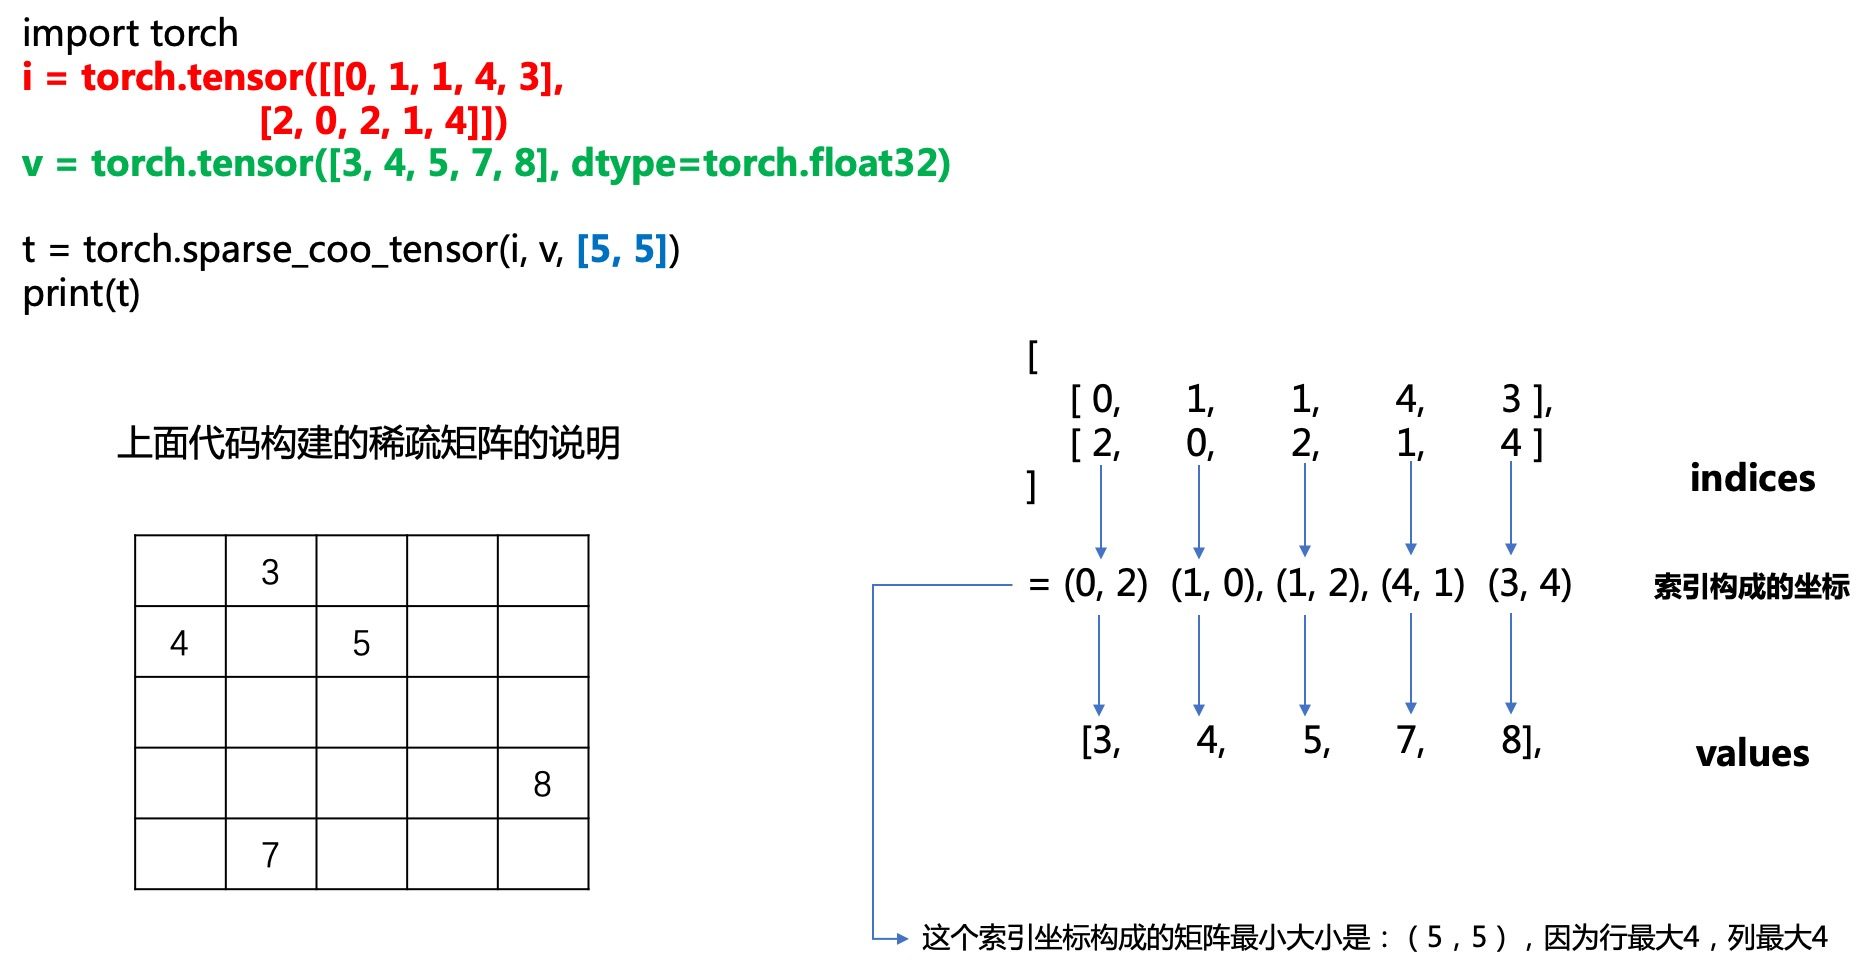

In [181]:
import torch
i = torch.tensor([[0, 1, 1, 4, 3],
                      [2, 0, 2, 1, 4]])
v = torch.tensor([3, 4, 5, 7, 8], dtype=torch.float32)
t = torch.sparse_coo_tensor(i, v, [5, 5])
print(t)
print(t.is_coalesced())     # uncoalesced的稀疏矩阵可以重复坐标，坐标最后的值是所有值的和。

tensor(indices=tensor([[0, 1, 1, 4, 3],
                       [2, 0, 2, 1, 4]]),
       values=tensor([3., 4., 5., 7., 8.]),
       size=(5, 5), nnz=5, layout=torch.sparse_coo)
False


In [182]:
import torch
i = torch.tensor([[0, 1, 1, 4, 3],
                       [2, 0, 0, 1, 4]])
v = torch.tensor([3, 4, 5, 7, 8], dtype=torch.float32)
t = torch.sparse_coo_tensor(i, v, [5, 5])

print(t.coalesce().values())    # 聚集才能打印值，不调用coalesce函数无法调用
print(t.coalesce().indices())    # 聚集才能打印值

tensor([3., 9., 8., 7.])
tensor([[0, 1, 3, 4],
        [2, 0, 4, 1]])


## as_tensor函数

- 这个函数构是转换为Tensor类型，如下情况，输入不会被拷贝:
    - data是Tensor，dtype与device不同；
    - data是ndarray，且device是CPU

```python
    torch.as_tensor(data, dtype=None, device=None) → Tensor
```

- 参数：
    - data：类似数组的数据，包含Tensor

In [183]:
import torch

i = torch.tensor([[0, 1, 1, 4, 3],
                       [2, 0, 0, 1, 4]])
v = torch.tensor([3, 4, 5, 7, 8], dtype=torch.float32)
t = torch.sparse_coo_tensor(i, v, [5, 5])

t2 = torch.as_tensor(t) 
print(t2)

lt = [1, 2, 3, 4]
t3 =  torch.as_tensor(lt) 
print(t3)
t3[1] = 88
print(lt)    # 不受tensor影响
lt[2] = 99
print(t3)     # 不受list影响

tensor(indices=tensor([[0, 1, 1, 4, 3],
                       [2, 0, 0, 1, 4]]),
       values=tensor([3., 4., 5., 7., 8.]),
       size=(5, 5), nnz=5, layout=torch.sparse_coo)
tensor([1, 2, 3, 4])
[1, 2, 3, 4]
tensor([ 1, 88,  3,  4])


In [184]:
import torch
import numpy as np

lt = np.array([1, 2, 3, 4])
t3 =  torch.as_tensor(lt) 
print(t3)
t3[1] = 88
print(lt)    # 受tensor影响
lt[2] = 99
print(t3)     # 受numpy影响

tensor([1, 2, 3, 4])
[ 1 88  3  4]
tensor([ 1, 88, 99,  4])


## as_strided函数

- 对已有的张量，重新按照其Storage重构张量。

```python
    torch.as_strided(input, size, stride, storage_offset=0) → Tensor
```

- 参数：
    - input (Tensor) – 输入张量
    - size (tuple or ints) – 输出张量的形状
    - stride (tuple or ints) – 输出张量非步长
    - storage_offset (int, optional) – 输出张量的数据开始的位置。
- 注意：
    - input要求必须是Tensor，而且不能是稀疏Tensor
    - 这个函数仅仅是view的别名函数而已，原理相同。

In [185]:
import torch

i = torch.tensor([[0, 1, 1, 4, 3],
                       [2, 0, 0, 1, 4]])
v = torch.tensor([3, 4, 5, 7, 8], dtype=torch.float32)
t = torch.sparse_coo_tensor(i, v, [5, 5])

t2 = torch.as_strided(t, (5, 5),  (5, 1)) 
# print(t2)

RuntimeError: No function is registered for schema aten::as_strided(Tensor(a) self, int[] size, int[] stride, int? storage_offset=None) -> Tensor(a) on backend SparseCPU

In [186]:
import torch

t = torch.Tensor([1,2,3,4,5,6,7,8, 9, 0])

t2 = torch.as_strided(t, (2, 3),  (3, 1)) 
print(t2)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


## from_numpy函数

- 这是一个专门为numpy数据转换为Tensor打造的函数；

```python
    torch.from_numpy(ndarray) → Tensor
```

- 说明：
    - 按照numpy的格式转换的Tensor，共享有相同的内存，两边的修改都会产生影响
    - 可以接受的类型的是：
        - ``numpy.float64``,
        - ``numpy.float32``, 
        - ``numpy.float16``, 
        - ``numpy.int64``, 
        - ``numpy.int32``,
        - ``numpy.int16``, 
        - ``numpy.int8``, 
        - ``numpy.uint8``
        - ``numpy.bool``.
   - 返回的Tensor不可改变大小（resizable） 。

In [187]:
import numpy as np
import torch

arr = np.array(
    [
        [1, 2, 3, 4],
        [5, 6, 7, 8]
    ],
    dtype=np.float32
)

t = torch.from_numpy(arr)

print(t)
print(t.requires_grad)  
t.requires_grad=True     # 这个属性只争对FloatTensor
print(t.requires_grad)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])
False
True


## zeros函数

- 构造0张量

```Python
    torch.zeros(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

- 参数：
    - size (int...) – 变长参数，指定张量的大小，a collection like a list or tuple.
    - out (Tensor, optional) – 输出张量；
    - dtype (torch.dtype, optional) – 张量类型，使用系统默认类型，如果是None，则使用全局缺省类型；
        - 全局缺省设置：torch.set_default_tensor_type()
    - layout (torch.layout, optional) – 数据布局，默认是torch.strided.
    - device (torch.device, optional) – 缺省设备，如果为None，则使用全局缺省设备
        - 全局设备设置：torch.set_default_tensor_type()). 
    - requires_grad (bool, optional) – 如果自动求导会记录操作在返回的张量上。
    
- 注意：
    - requires_grad=True的情况只对torch.float有效，其他不允许使用。

In [188]:
import torch

t = torch.zeros(2,3, dtype=torch.float, requires_grad=True)   
# t = torch.zeros(2,3, dtype=torch.int32, requires_grad=True)      # 会抛出异常。
print(t)
print(t.requires_grad)  
t.requires_grad=True     # 这个属性只争对FloatTensor
print(t.requires_grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]], requires_grad=True)
True
True


## zeros_like函数

- 构造同型0张量

```Python
    torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False) → Tensor
```

- 构造一个同型0张量。
    - 仅仅借用输入的shape，其他没有任何联系。

In [189]:
import torch


t = torch.tensor([1, 2, 3, 4])

z = torch.zeros_like(t, dtype=torch.float, requires_grad=True)   
print(z)

tensor([0., 0., 0., 0.], requires_grad=True)


## ones函数

- 构造1张量
    - 与zeros函数相同用法

```Python
    torch.ones(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```



In [190]:
import torch

t = torch.ones(2,3, dtype=torch.float, requires_grad=True)   
# t = torch.ones(2,3, dtype=torch.int32, requires_grad=True)      # 会抛出异常。
print(t)
print(t.requires_grad)  
t.requires_grad=True     # 这个属性只争对FloatTensor
print(t.requires_grad)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
True
True


## ones_like函数

- 构造同型 1 张量

```Python
    torch.ones_like(input, dtype=None, layout=None, device=None, requires_grad=False) → Tensor
```

In [191]:
import torch


t = torch.tensor([1, 2, 3, 4])

z = torch.ones_like(t, dtype=torch.float, requires_grad=True)   
print(z)

tensor([1., 1., 1., 1.], requires_grad=True)


## arange函数

- 连续值张量构造。
    - 构造的张量只能是1-D的。
    - 与python的内置函数range类似

```Python
    torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

- 参数
    - start=0, end是半开半闭区间` [ start, end )`
    - 返回的1-D数组的长度为: $\dfrac{\text{start} - \text{end}}{\text{step}}$
    - 默认返回int63或者long类型

In [192]:
import torch

t = torch.arange(1, 100, 2)
print(t)
print(t.dtype)

tensor([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71,
        73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])
torch.int64


In [193]:
import torch

o_t = torch.Tensor(5,5)
print(id(o_t))
t = torch.arange(100, out=o_t)    # 原来的形状被改变，同一个对象
print(t)
print(o_t)
print(id(o_t))

4619477784
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82., 83.,
        84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 97.,
        98., 99.])
tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        70., 71., 72., 73., 74., 7

## range函数

- 构造连续值张量
    - 与python的内置函数range类似
    - 该函数已经不推荐使用，在torch0.5后会取消。被arange替代。
```Python
    torch.range(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

- 说明：
    - 返回默认是float；
    - 使用的闭区间:``[  start, end ]``

In [194]:
import torch

t = torch.range(1, 100, 1)
print(t)

tensor([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
         49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
         85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100.])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


## linspace函数

- 构建连续值张量，与arange使用方式一样
    - 但是区别是linespace是指定取样总数，而不是步长。
    - 返回的默认类型是：float

```Python
    torch.linspace(start, end, steps=100, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

In [195]:
import torch
t = torch.linspace(0,100, 200)
print(t.shape, t.dtype)

torch.Size([200]) torch.float32


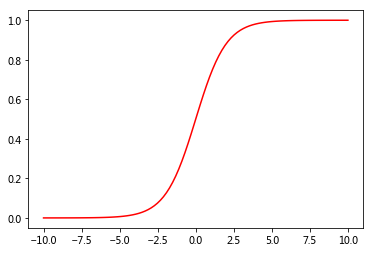

In [196]:
# 应用下可视化
%matplotlib inline
import torch
import matplotlib.pyplot  as plt

x = torch.linspace(-10,10, 100, ) 
y = x.sigmoid()

plt.plot(x, y, color=(1,0,0,1))
plt.show()

## logspace函数

- 构造连续对数张量
    - 该张量主要在可视化坐标表达有比较直观的作用。
    - 构造的公式区间是（采用的是指数）：
        - [${\text{base}} ^ {\text{start}}  , {\text{base}} ^ {\text{end}}$]

```Python
    torch.logspace(start, end, steps=100, base=10.0, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

tensor([1.0000e-10, 1.0000e+10])
tensor(-10.) tensor(10.)


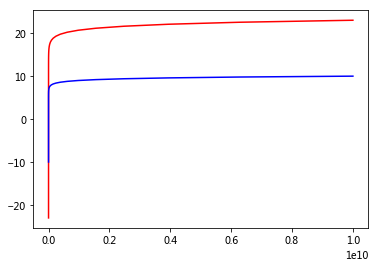

In [197]:
# 应用下可视化
%matplotlib inline
import torch
import matplotlib.pyplot  as plt

x = torch.logspace(-10, 10, 100) 
print(x[[0, 99]])   # 输出第一个与最后一个。
y_e = x.log()      # 自然对数
y_10 = x.log10()    # 常用对数

plt.plot(x, y_e, color=(1,0,0,1))   
plt.plot(x, y_10, color=(0,0,1,1))
print(y_10[0] , y_10[99])
plt.show()

## eye函数

- 构造单位张量
    - 单位矩阵

```Python
    torch.eye(n, m=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

In [198]:
import torch
t = torch.eye(4, 4)
print(t)
print(t.dtype)
print(t.device)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
torch.float32
cpu


## empty函数

- 构造空矩阵张量
    - 所谓空张量，就是Storage是原生态没有初始化的内存块，数据是原内存遗留的数据，看起来是随机的。

```Python
    torch.empty(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False) → Tensor
```

In [199]:
import torch
t = torch.empty(4, 4)
print(t)
print(t.dtype)

tensor([[ 0.0000e+00, -2.0000e+00,  0.0000e+00, -2.0000e+00],
        [ 1.1210e-44,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
torch.float32


## empty_like函数

- 构造同型空张量
    - 借用其他张量的shape。

```Python
    torch.empty_like(input, dtype=None, layout=None, device=None, requires_grad=False) → Tensor
```

In [200]:
import torch
t = torch.empty(4, 4)
print(t)
print(t.dtype)

tensor([[1.4013e-44, 1.6255e-43, 4.4842e-44, 1.6255e-43],
        [1.5554e-43, 1.5975e-43, 1.3873e-43, 1.4574e-43],
        [1.4013e-44, 1.6255e-43, 4.4842e-44, 8.5479e-44],
        [4.4842e-44, 1.6255e-43, 1.5554e-43, 1.5975e-43]])
torch.float32


## empty_strided函数

- 按照步长构造的张量
    - 使用stride参数指定步长；
```Python
    torch.empty_strided(size, stride, dtype=None, layout=None, device=None, requires_grad=False, pin_memory=False) → Tensor
```

- 参数：
    - size (tuple of python:ints) – 使用元组格式的张量大小
    - stride (tuple of python:ints) – 元组格式的步长
    - dtype (torch.dtype, optional) – 指定张量类型，默认使用全局设置的类型（torch.set_default_tensor_type()）.
    - layout (torch.layout, optional) – 张量的内存布局方式：torch.strided.
    - device (torch.device, optional) – 设备
    - requires_grad (bool, optional) – 是否可求导，默认是False
    - pin_memory (bool, optional) – 固定内存，只作用于GPU。

- 注意：
    - 使用stride可能产生中间没有使用的内存空间，见下面例子。

In [201]:
import torch
t = torch.empty_strided(size=(4, 4), stride=[8, 1])
print(t)
print(t.dtype)

print(t.storage().size())

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.3593e-43, 1.4714e-43, 1.5134e-43],
        [5.6052e-45, 1.3107e-08, 5.1126e+22, 2.6663e-09]])
torch.float32
28


## full函数

- 使用指定值创建的张量
    - 张量所有元素一样。

```Python
    torch.full(size, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

- 参数：
    - size (int...) – a list, tuple, or torch.Size：指定张量shape；
    - fill_value – the number to fill the output tensor with：填充值；必须是标量的数值型数据。
    - 其他参数与上面类似

In [202]:
import torch
t = torch.full(size=(4, 4), fill_value=88)
print(t)
print(t.dtype)

print(t.storage().size())

tensor([[88., 88., 88., 88.],
        [88., 88., 88., 88.],
        [88., 88., 88., 88.],
        [88., 88., 88., 88.]])
torch.float32
16


## full_like函数

- 借助已知张量形状构建填充指定值的张量

```Python
    torch.full_like(input, fill_value, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
```

In [203]:
import torch

o = torch.Tensor([1,2,3])

t = torch.full_like(o, fill_value=88)
print(t)
print(t.dtype)

print(t.storage().size())

tensor([88., 88., 88.])
torch.float32
3


# 张量全局操作与设置函数

## cat函数

- 合并两个张量

```Python
    torch.cat(tensors, dim=0, out=None) → Tensor
```

- 参数
    - tensors (sequence of Tensors) ：被链接的张量，是张量序列
    - dim (int, optional)：合并的维度，按照那个维度合并，比如按照行合并，或者按照列合并
    - out：可以使用参数返回（这是典型的C实现的后遗症）
    
- 注意：
    - 要求合并的张量都不需要有一样的shape。
    - 这个函数是torch.split() 与torch.chunk()函数的逆操作。
    - 这个函数于stack的区别在于，这个函数不改变维度。

In [204]:
import torch
t_1 = torch.full(size=(2, 4), fill_value=1)
t_2 = torch.full(size=(2, 4), fill_value=2)
t_3 = torch.full(size=(2, 4), fill_value=3)
t_4 = torch.full(size=(2, 4), fill_value=4)

y_row = torch.cat(tensors=(t_1, t_2, t_3, t_4), dim=0)
y_col = torch.cat(tensors=(t_1, t_2, t_3, t_4), dim=1)
print(y_row)
print(y_col)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])
tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4.],
        [1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 4., 4., 4., 4.]])


## stack函数

- 按照新的维度合并张量
    - 这个函数与cat函数类似，但是在合并的方向，会增加维度。
    
```python
    torch.stack(tensors, dim=0, out=None) → Tensor
```

In [205]:
import torch
t_1 = torch.full(size=(2, 4), fill_value=1)
t_2 = torch.full(size=(2, 4), fill_value=2)
t_3 = torch.full(size=(2, 4), fill_value=3)
t_4 = torch.full(size=(2, 4), fill_value=4)

y_row = torch.stack(tensors=(t_1, t_2, t_3, t_4), dim=0)
y_col = torch.stack(tensors=(t_1, t_2, t_3, t_4), dim=1)
print(y_row)
print(y_col)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[2., 2., 2., 2.],
         [2., 2., 2., 2.]],

        [[3., 3., 3., 3.],
         [3., 3., 3., 3.]],

        [[4., 4., 4., 4.],
         [4., 4., 4., 4.]]])
tensor([[[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.],
         [4., 4., 4., 4.]],

        [[1., 1., 1., 1.],
         [2., 2., 2., 2.],
         [3., 3., 3., 3.],
         [4., 4., 4., 4.]]])


## narrow函数

- 缩小张量：按照指定的维度，取部分张量的数据构成新的张量。
    

```python
    torch.narrow(input, dim, start, length) → Tensor
```

- 参数：
    - iput：需要缩小的张量；
    - dim：缩小操作所在的维度；
    - start：指定维度开始的数据；
    - length：需要取得数据长度；

In [206]:
import torch
t_1 = torch.full(size=(2, 4), fill_value=1)
t_2 = torch.full(size=(2, 4), fill_value=2)
t_3 = torch.full(size=(2, 4), fill_value=3)
t_4 = torch.full(size=(2, 4), fill_value=4)

y_row = torch.stack(tensors=(t_1, t_2, t_3, t_4), dim=0)
# print(y_row)
print(y_row.shape)    # 4, 2, 4
y = torch.narrow(input=y_row, dim=2, start=1,length=2)
print(y)

torch.Size([4, 2, 4])
tensor([[[1., 1.],
         [1., 1.]],

        [[2., 2.],
         [2., 2.]],

        [[3., 3.],
         [3., 3.]],

        [[4., 4.],
         [4., 4.]]])


## nonzero函数

- 返回指定张量中所有非0元素的索引
    - 参数as_tuple=True表示返回的是坐标，坐标由返回的元组的对应值构成坐标，元组长度根据Tensor的维度决定。
    - 参数as_tuple=False返回的是列表的列表。

```python
    torch.nonzero(input, *, out=None, as_tuple=False) → LongTensor or tuple of LongTensors
```

In [207]:
import torch

t = torch.LongTensor(
    [
            [0, 88, 88],
            [88, 0, 0]
    ]
)

list_index = torch.nonzero(t, as_tuple=False)
print(list_index)
index_x, index_y =  torch.nonzero(t, as_tuple=True)
print(index_x, index_y)

tensor([[0, 1],
        [0, 2],
        [1, 0]])
tensor([0, 0, 1]) tensor([1, 2, 0])


## reshape函数

- 等价于view，如果张量的storge是连续于stride的。否则可能是数据拷贝。

```python
    torch.reshape(input, shape) → Tensor
```

- 参数：
    - input (Tensor) – the tensor to be reshaped
    - shape (tuple of python:ints) – the new shape
    
- reshape前后的元素个数相等。形状的维度随意。

In [208]:
import torch

t = torch.LongTensor(
    [
            [0, 88, 88, 99],
            [88, 0, 0, 77],
            [88, 0, 0, 77],
    ]
)

print(torch.reshape(t, shape=(2, 2, 3)))

tensor([[[ 0, 88, 88],
         [99, 88,  0]],

        [[ 0, 77, 88],
         [ 0,  0, 77]]])


## split函数

- 切分张量为多个部分，与chunck函数类似。

```python
    torch.split(tensor, split_size_or_sections, dim=0)    # 按照指定维度切分
```

- 参数
    - tensor (Tensor) – tensor to split.
    - split_size_or_sections (int) or (list(int)) – 切分的方案
        - 如果是整数，就按照整数作为长度切分，剩余的不足就作为一个切分。
        - 如果是列表，就按照列表指定的长度切分，但是列表长度的和必须等于原来维度的长度。
    - dim：切分的维度

- chunck是指定等分的份数，不是指定切分的长度。

In [209]:
import torch

t = torch.ones(10, 3)
# print(t)
chunks = torch.split(t, split_size_or_sections=3, dim=0)     
print(chunks)
chunks = torch.split(t, split_size_or_sections=(3, 2, 3, 2), dim=0)     
print(chunks)

(tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.]]))
(tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.]]))


## 其他在Tensor中也有的函数

1. where 函数
2. unsqueeze 函数
3. squeeze 函数
4. unbind 函数
5. transpose 函数：维度交换
6. t 函数：矩阵转置,只争对1-2维的情况
6. take 函数
7. masked_select 函数
8. index_select 函数
9. gather 函数
10. chunk 函数


In [210]:
import  torch

t = torch.Tensor(3)
print(t.t().shape)

t = torch.Tensor(3, 2)
print(t.t().shape)

t = torch.Tensor(2, 3, 4)
# print(t.t().shape)    # 错误的，超过2维了

torch.Size([3])
torch.Size([2, 3])


# 随机创建Tensor函数

## Tensor的成员中的随机元素生成函数

1. torch.Tensor.bernoulli_() - 伯努利分布随机；
2. torch.Tensor.cauchy_() - 柯西分布随机；
3. torch.Tensor.exponential_() - 指数分布随机；
4. torch.Tensor.geometric_() - 几何分布随机；
5. torch.Tensor.log_normal_() - log-normal分布随机；
6. torch.Tensor.normal_() - 正态分布随机；
7. torch.Tensor.random_() - 理算统一分布随机；
8. torch.Tensor.uniform_() - 连续统一分布随机；

## 创建Tensor的全局静态函数



### 随机种子函数

- 用来管理（伪）随机数产生的状态。
     - 随机数的产生也是使用算法来产生的，影响这些算法结果的参数就是随机种子产生器。
     - 这不讲原理，主要是使用。
     - 下面几个函数否会影响到随机数的生成，设置随机种子函数是
         - seed函数
         - torch.manual_seed(seed)函数

1. seed函数
    - 设置缺省的随机种子（64位），将用于生成随机数的种子设置为非确定性随机数（有的采用的是当前系统时间）。
    - torch.seed()

2. manual_seed函数
    - torch.manual_seed(seed)
    
3. initial_seed函数
    - torch.initial_seed()
    
4. get_rng_state函数
    - torch.get_rng_state()

5. set_rng_state函数
    - torch.set_rng_state

6. default_generator属性
    - torch.default_generator 


In [211]:
import torch
import time

# 1. seed
print(torch.seed())   # 设置随机种，并返回种子，不确定性种子

# 2. 手工设置随机种
gen = torch.manual_seed(1000)    # 设置并返回
print(gen)   # 返回一个生成器：返回的是系统生成器，不过随机种是用户手工设置

# 6. 缺省的生成器
print(torch.default_generator)

# 3. initial_seed函数
print(torch.initial_seed())   # 返回当前初始化的随机种子，不设置

# 得到随机状态
print(torch.get_rng_state())

6489190845875486582
1000
tensor([232,   3,   0,  ...,   0,   0,   0], dtype=torch.uint8)


###  随机种子类

- 上面的函数都是操作一个全局的随机生成器对象，该对象的类型是：
    - `torch._C.Generator(device='cpu') → Generator`
    - 这个对象的成员函数，都是上面全局函数。
    - 随机生成对象，一般应用需要一个即可，所以，torch自动创建，并通过全局函数控制随机生成器对象，从而影响所有使用随机生成器对象的函数的输出。

### bernoulli伯努利随机分布

- `torch.bernoulli(input, *, generator=None, out=None) → Tensor`
    - 参数：
        - input (Tensor) –计算概率的输入张量值
        - 返回值是0或者1，输出服从伯努利分布（0-1分布）
        - $\text{out}_i ∼ Bernoulli(p=\text{input}_i)$

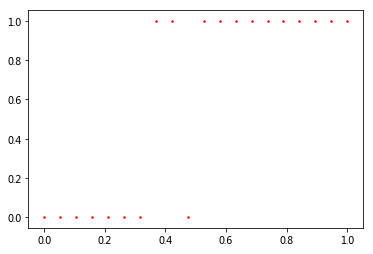

In [212]:
# 应用下可视化
%matplotlib inline
import torch
import matplotlib.pyplot  as plt

x = torch.linspace(0, 1, 20)     # 数据只能在0-1之间概率

y = torch.bernoulli(x)   # 使用默认随机种子生成器

plt.scatter(x, y, color=(1,0,0,1), s=2**1 )   
plt.show()

### multinomial多项式随机分布

- 多项式分布式是伯努利分布的推广

- `torch.multinomial(input, num_samples, replacement=False, out=None) → LongTensor`

    - 参数：
        - input (Tensor) – 等于权重
        - num_samples (int) – 采样数（伯努利0-1分布，多次0-1的结果概率统计就是多项式分布）
        - replacement (bool, optional) – 放回还是不放回取样
        - out (Tensor, optional) –输出

In [213]:
import torch
import matplotlib.pyplot  as plt

x = torch.linspace(0, 1, 30)     # 数据只能在0-1之间概率
print(x)
y = torch.multinomial(x, num_samples=10, replacement=True)   # 使用默认随机种子生成器

# plt.scatter(x, y, color=(1,0,0,1), s=2**1 )     
# plt.show()
print(y.shape, y)    # 10次，每次30个中出现1 的次数

# torch.Size([10]) tensor([23, 21,  8, 19, 27, 20, 26, 29, 18, 14])
# 第1次出现23个1，第2次21个1，第3词8个1，一次类推

tensor([0.0000, 0.0345, 0.0690, 0.1034, 0.1379, 0.1724, 0.2069, 0.2414, 0.2759,
        0.3103, 0.3448, 0.3793, 0.4138, 0.4483, 0.4828, 0.5172, 0.5517, 0.5862,
        0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966,
        0.9310, 0.9655, 1.0000])
torch.Size([10]) tensor([10, 22, 11, 15, 26, 21, 12,  4, 29, 26])


### 高斯分布

- `torch.normal(mean, std, out=None) → Tensor`
    - 参数：
        - mean：均值
        - std：方差
- 因为参数可以是标量与向量，其表示的含义也有差异，所以normal函数有多种使用方式：
    - 方式一：
        - mean（Tensor）：每个输出的均值
        - std（Tensor）：每个输出的方差
    - 方式二：
        - mean (float, optional) ：所有输出的均值
        - std (Tensor) ：每个元素的方法
    - 方式三：
        - mean (Tensor) – 每个输出的均值
        - std (float, optional) – 所有输出的方差
        
    - 方式四：
        - mean (float) – 所以输出的均值
        - std (float) – 所有输出的方差
        - size (int...) – 输出张量的shape，类型是序列

In [214]:
import torch

t = torch.normal(0, 1.0, size=(4, 4))
print(t)

tensor([[-0.6619, -0.0582,  1.0059,  0.5642],
        [ 1.9159, -0.0919, -0.0955,  0.1474],
        [-0.8056,  0.0583, -0.0816, -2.7257],
        [-1.4878, -1.3920,  2.2023,  0.2243]])


### 0-1统一分布

 - `torch.rand(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`
 - `torch.rand_like(input, dtype=None, layout=None, device=None, requires_grad=False) → Tensor`

In [215]:
import torch

t = torch.rand(size=(4, 4))
print(t)
t = torch.rand(4, 4)
print(t)

tensor([[0.0148, 0.6573, 0.8463, 0.8787],
        [0.5838, 0.3050, 0.4746, 0.0229],
        [0.6680, 0.5553, 0.0865, 0.4258],
        [0.6251, 0.5168, 0.1260, 0.4440]])
tensor([[0.6688, 0.5381, 0.9404, 0.8110],
        [0.0793, 0.6212, 0.3379, 0.6475],
        [0.7198, 0.1503, 0.6447, 0.8081],
        [0.0081, 0.3580, 0.2408, 0.8467]])


### 指定范围的随机整数
- `torch.randint(low=0, high, size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`
- `torch.randint_like(input, low=0, high, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`

In [216]:
import torch

t = torch.randint(low=0, high=10, size=(3,4))   # 不包含high
print(t)


tensor([[3, 5, 5, 8],
        [8, 6, 9, 9],
        [0, 5, 9, 8]])


### 标准正态分布
- `torch.randn(*size, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor`
- `torch.randn_like(input, dtype=None, layout=None, device=None, requires_grad=False) → Tensor`



In [217]:
import torch

t = torch.randn(3,4)   # 均值为0，方差为1
print(t)

tensor([[-0.4149,  0.8210, -0.3328, -0.1037],
        [ 0.3303,  0.4522, -1.5808, -0.1078],
        [-0.2900,  0.4803,  0.0373,  0.0158]])


### 随机排列组合
- `torch.randperm(n, out=None, dtype=torch.int64, layout=torch.strided, device=None, requires_grad=False) → LongTensor`

In [218]:
import torch

t = torch.randperm(10)   # 不包含10
print(t)

tensor([9, 1, 3, 8, 6, 2, 0, 7, 5, 4])


# 全局设置与判别函数

## 判别函数

### 张量判别与存储
- `torch.is_tensor(obj)`
- `torch.is_storage(obj)`


### 判别类型是否是浮点数

- `torch.is_floating_point(input) -> (bool)`

### 返回元素个数

- `torch.numel(input) → int`

## 设置函数

### 设置或者获取缺省数据类型

- `torch.set_default_dtype(d)`
    - 设置的是`torch.tensor()`的缺省类型。

- `torch.get_default_dtype() → torch.dtype`


### 设置Tensor的缺省类型

- `torch.set_default_tensor_type(t)`
    - 设置Tensor的默认类型；
    - 也对tensor函数有效。

### 设置打印选项

- `torch.set_printoptions(precision=None, threshold=None, edgeitems=None, linewidth=None, profile=None, sci_mode=None)`
    - 参数：
        - precision –：浮点数输出精度；缺省4；
        - threshold –：Tensor输出省略号的元素最大阈值；缺省1000；
        - edgeitems –：省略输出的个数；缺省3；
        - linewidth –：每行的字符宽度；缺省80；如果有threshold参数，该参数被忽略；
        - profile –：输出选项设置，符号上面任何设置，取值为default, short, full
        - sci_mode –：开始科学记数法；取值True与False，缺省为None；None的格式由 _Formatter设置。

In [219]:
import torch

t = torch.randn(100,100)
# 默认输出
print(t)

tensor([[ 1.0104,  0.5672, -0.3641,  ...,  0.7242,  0.7394, -1.4221],
        [-1.1162, -0.6423,  0.5711,  ...,  0.6867, -0.6276, -0.1440],
        [ 0.0079,  0.9556, -1.1738,  ..., -2.0242,  1.0075,  0.8763],
        ...,
        [-1.8785,  0.6135,  0.9522,  ...,  0.2765, -1.3314,  2.3584],
        [ 0.1544,  0.5971,  0.7356,  ...,  0.4711,  0.2345, -0.4296],
        [-0.5048, -1.3926, -0.0838,  ..., -0.5157,  1.1167, -0.5052]])


In [224]:
import torch

t = torch.randn(100,100)
# 格式输出
torch.set_printoptions(
    precision=2,
    threshold=1000,   # 设置为10000就全部打印了
    edgeitems=5,    # 每行，前后5个，每列器安后个
    linewidth=80   # 每行的宽度
)
print(t)

tensor([[ 1.19, -0.52,  0.27, -0.87,  0.55,  ..., -0.77,  0.34, -0.77, -0.54,
         -2.60],
        [-0.77,  0.32, -0.82,  1.16, -0.80,  ...,  0.67, -0.79, -0.96, -0.84,
         -2.17],
        [ 1.13,  0.20, -0.86,  0.50,  0.01,  ..., -1.07,  0.45, -2.37, -0.11,
         -1.01],
        [ 1.17,  0.45,  0.39, -0.21, -1.98,  ...,  0.28, -0.53, -0.38, -0.11,
          0.15],
        [ 0.25,  1.07,  1.00, -0.25,  1.64,  ...,  0.14,  0.71,  0.11, -1.51,
         -0.09],
        ...,
        [ 1.89,  1.55, -1.16,  1.69,  0.65,  ..., -0.47, -0.12,  1.48, -0.66,
         -0.27],
        [ 0.09,  0.31,  0.68, -0.64,  1.15,  ..., -0.27, -0.12,  0.05,  1.78,
          0.12],
        [-0.74,  0.90,  1.65,  0.47,  0.74,  ...,  0.21, -0.79,  0.63,  0.40,
         -0.20],
        [ 0.86,  0.77,  1.87, -0.49, -1.19,  ..., -1.95, -0.70,  1.73,  0.32,
         -0.22],
        [ 0.76, -0.66, -0.66,  0.57,  0.07,  ...,  0.88, -0.99,  0.11, -1.47,
          0.08]])


In [226]:
import torch

t = torch.randn(100,100)
# short与输出
torch.set_printoptions(
    precision=2,
    profile='short'    # full default, short三个值
)
print(t)

tensor([[-0.72,  2.27,  ...,  0.03, -0.40],
        [-0.12, -0.29,  ..., -0.33, -0.72],
        ...,
        [ 0.10,  1.56,  ...,  0.83, -0.26],
        [ 0.88,  0.35,  ...,  1.03, -0.08]])


### 非规范浮点数使用设置

- `torch.set_flush_denormal(mode) → bool`
    - 设置成功（表示支持），返回True，否则返回False。
    - 仅仅在x86结构的CPU上支持；

In [228]:
import torch
print(torch.set_flush_denormal(True))
print(torch.set_flush_denormal(False))

True
True


----